In [182]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import os
import json
import seaborn
import statsmodels.api as sm

# s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
# pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Can we measure and predict energy use based on observables that are easy to acquire?

In [183]:
nrg = pd.read_csv(os.getenv("PUIDATA") + '/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [184]:
get_ipython().system("curl -O 'http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  45.2M      0 --:--:-- --:--:-- --:--:-- 46.5M


In [185]:
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [186]:
os.system("unzip " + os.getenv("PUIDATA") + '/' + "mn_mappluto_16v1.zip")

256

In [187]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/manhattan/MNMapPLUTO.shp')
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [188]:
#bsize.columns

In [189]:
bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [190]:
bsize.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal'], dtype='object')

In [191]:
os.path.isfile(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

True

In [192]:
os.path.isfile(os.getenv("PUIDATA") + "/manhattan/MNMapPLUTO.shp")

True

In [193]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
# nrg.head()

In [194]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43fdb0890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff44445aa50>]], dtype=object)

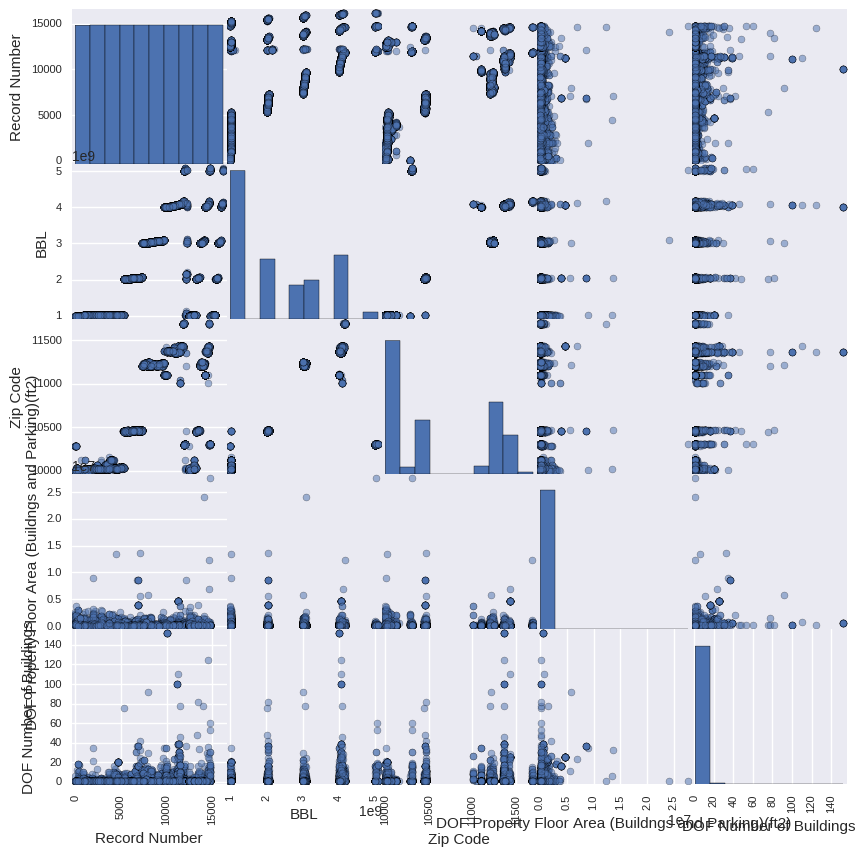

In [195]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=100, figsize=(10, 10))

### columns from bsize that we want to keep are: BBL
### columns from nrg that we want to keep are: BBL, Site EUI(kBtu/ft2), Reported Property Floor Area (Building(s)) (ft²)

In [196]:
nrg.drop([u'Record Number', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)

In [197]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,Not Available,918919
1,4.021460e+09,NaN,NaN,NaN
2,2.027620e+09,NaN,Not Available,64200
3,1.006700e+09,NaN,NaN,NaN
4,2.048300e+09,NaN,Not Available,50000


In [198]:
nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [199]:
nrg.drop(['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'], axis=1, inplace=True)

In [200]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [201]:
bblnrgdata = pd.merge(nrg, bsize, on=['BBL'])
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,0,1
1,1.004370e+09,NaN,NaN,0,4
2,1.013110e+09,125.4,330000,0,56
3,1.009220e+09,NaN,NaN,148,148
4,1.007400e+09,NaN,68329,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff433b90d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff443ce83d0>]], dtype=object)

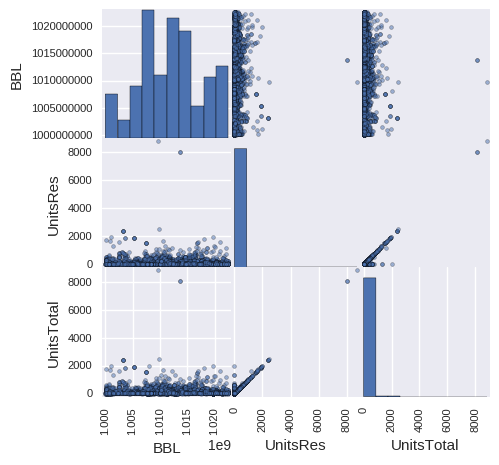

In [202]:
scatter_matrix (bblnrgdata, s=30, figsize=(5, 5))

In [203]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    
indy = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indy))
nrg['Site EUI(kBtu/ft2)'][~indy] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [204]:
indx = (np.vectorize(canconvert)(bblnrgdata['UnitsTotal']))
print ("invalid entries changed to NaN %d"%sum(indx))
bblnrgdata['UnitsTotal'][~indx] = float('NaN')

invalid entries changed to NaN 6492


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


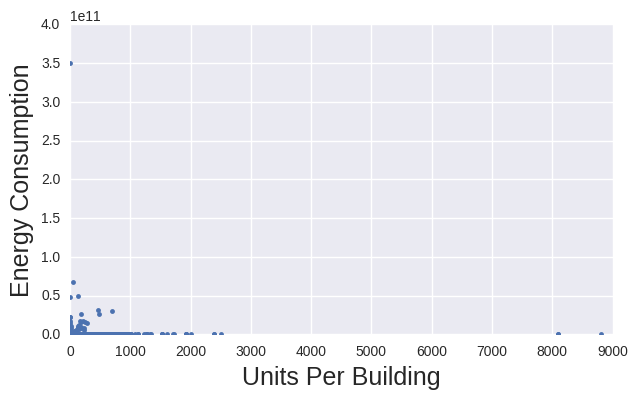

In [205]:
# creating variables for use in scatter plot
xdata = pd.to_numeric(bblnrgdata['UnitsTotal'],errors="coerce")

# the following calculates the energy use for the whole building
energypersqft = pd.to_numeric(bblnrgdata['Site EUI(kBtu/ft2)'],errors="coerce")
area = pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
ydata = energypersqft * area

fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
plt.show()

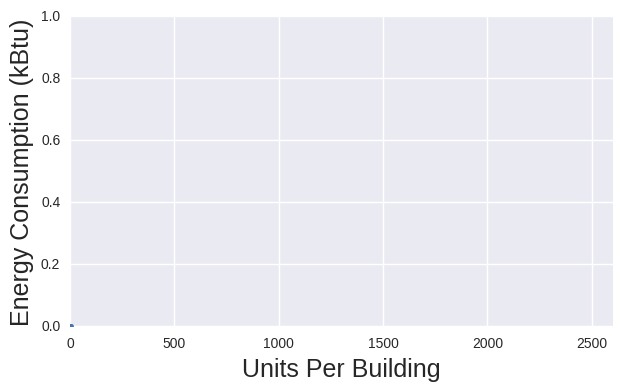

In [206]:
# for some reason, when I adjust axes, the data disappears

fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
ax.axis([0, 7000, 0, 1])
ax.set_xlim(0,2600)
#ax.set_ylim(0,1)
plt.show()

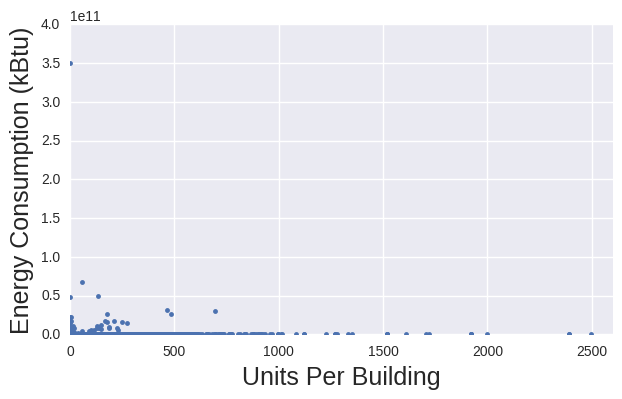

In [216]:
# What's happening? Setting a y limit causes the data to disappear, but setting a the x limit doesn't.
# Even setting the y limit for 4, the default above, causes the data to disappear. What's happening?

fig, ax = plt.subplots()
fig.set_size_inches(7,4)
ax.plot(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
# ax.axis([0, 7000, 0, 1])
ax.set_xlim(0,2600)
# ax.set_ylim(0,1)
plt.show()

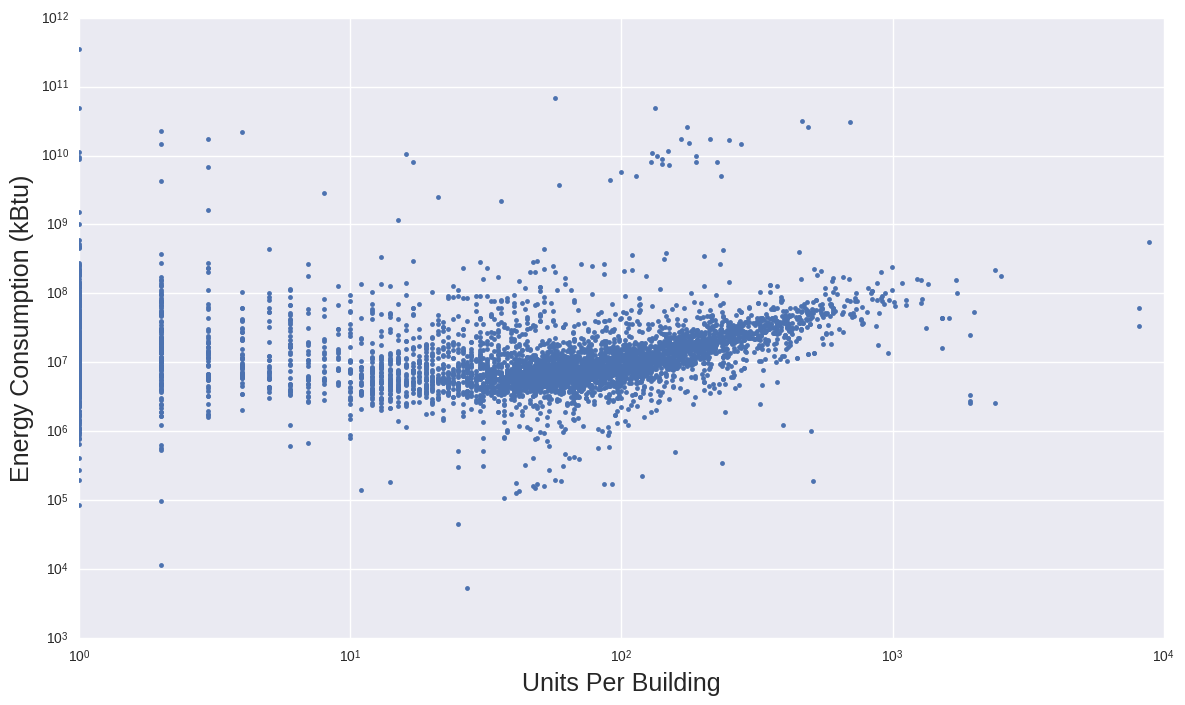

In [208]:
# creating log plot of existing variables

fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.loglog(xdata, ydata, '.')
ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
ax.set_xlabel('Units Per Building', fontsize=18)
plt.show()

### removing NaN, renaming columns, and adding TotalEnergy to the dataframe

In [209]:
bblnrgdata.dropna(axis='rows', inplace=True)
bblnrgdata.rename(columns={'Site EUI(kBtu/ft2)': 'EnergySqFt'}, inplace=True)
bblnrgdata.rename(columns={'Reported Property Floor Area (Building(s)) (ft²)': 'Area'}, inplace=True)
bblnrgdata['TotalEnergy'] = energypersqft * area
bblnrgdata.head()

,BBL,EnergySqFt,Area,UnitsRes,UnitsTotal,TotalEnergy
2,1.013110e+09,125.4,330000,0,56,41382000.0
10,1.010140e+09,154.9,841709,0,2,130380724.1
15,1.007660e+09,122.3,59468,0,8,7272936.4
16,1.008150e+09,117,364000,0,24,42588000.0
18,1.005050e+09,82.1,235370,0,24,19323877.0


In [210]:
# selecting only values over 0, dropping unneeded UnitsRes column

df = bblnrgdata[(bblnrgdata['UnitsTotal'] > 0) & (bblnrgdata['TotalEnergy'] > 0)]
df.drop(['UnitsRes'], axis=1, inplace=True)
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,BBL,EnergySqFt,Area,UnitsTotal,TotalEnergy
2,1.013110e+09,125.4,330000,56,41382000.0
10,1.010140e+09,154.9,841709,2,130380724.1
15,1.007660e+09,122.3,59468,8,7272936.4
16,1.008150e+09,117,364000,24,42588000.0
18,1.005050e+09,82.1,235370,24,19323877.0


In [211]:
# unsuccessfully plotting new data with only values over 0

# ax = df1.plot.scatter(x=df1.UnitsTotal, y=df1.TotalEnergy, s=30, loglog=True)
# ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
# ax.set_xlabel('Units Per Building', fontsize=18)
# ax.set_title('Log plot with adjusted data')
# ax.set_ylim()
# plt.show()

In [212]:
# another unsuccessful attempt

#fig, ax = plt.subplots()
#fig.set_size_inches(14,8)
#ax.loglog(df1.UnitsTotal, df1.TotalEnergy, '.')
#ax.set_ylabel('Energy Consumption (kBtu)', fontsize=18)
#ax.set_xlabel('Units Per Building', fontsize=18)
#ax.set_title('Log plot with adjusted data')
#plt.show()

In [228]:
# creating new columns that are log10 versions of existing columns

df['log_units'] = df.UnitsTotal.map(np.log10)
df['log_energy'] = df.TotalEnergy.map(np.log10)
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BBL,EnergySqFt,Area,UnitsTotal,TotalEnergy,log_units,log_energy
2,1.013110e+09,125.4,330000,56,41382000.0,1.748188,7.616811
10,1.010140e+09,154.9,841709,2,130380724.1,0.301030,8.115213
15,1.007660e+09,122.3,59468,8,7272936.4,0.903090,6.861710
16,1.008150e+09,117,364000,24,42588000.0,1.380211,7.629287
18,1.005050e+09,82.1,235370,24,19323877.0,1.380211,7.286094


In [230]:
#trying another way for kicks
df['log_units_2'] = np.log10(df.UnitsTotal)
df['log_energy_2'] = np.log10(df.TotalEnergy)
df.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,BBL,EnergySqFt,Area,UnitsTotal,TotalEnergy,log_units,log_energy,log_units_2,log_energy_2
2,1.013110e+09,125.4,330000,56,41382000.0,1.748188,7.616811,1.748188,7.616811
10,1.010140e+09,154.9,841709,2,130380724.1,0.301030,8.115213,0.301030,8.115213
15,1.007660e+09,122.3,59468,8,7272936.4,0.903090,6.861710,0.903090,6.861710
16,1.008150e+09,117,364000,24,42588000.0,1.380211,7.629287,1.380211,7.629287
18,1.005050e+09,82.1,235370,24,19323877.0,1.380211,7.286094,1.380211,7.286094


In [298]:
# sm.OLS(y, X, ...)
model = sm.OLS(df.log_energy, sm.add_constant(df.log_units), missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_energy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     63.79
Date:                Thu, 20 Oct 2016   Prob (F-statistic):           1.70e-15
Time:                        15:04:14   Log-Likelihood:                -3867.6
No. Observations:                4997   AIC:                             7739.
Df Residuals:                    4995   BIC:                             7752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9116      0.020    353.804      0.000         6.873     6.950
log_units      0.0865      0.011      7.987      0.000         0.065     0.108
==============================================================================
Omnibus:                     2221.478   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27205.366
Skew:                           1.791   Prob(JB):                         0.00
Kurtosis:                      13.855   Cond. No.                         6.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
model2 = sm.OLS(df.log_units, sm.add_constant(df.log_energy), missing='drop')
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_units   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     63.79
Date:                Thu, 20 Oct 2016   Prob (F-statistic):           1.70e-15
Time:                        15:05:29   Log-Likelihood:                -5173.8
No. Observations:                4997   AIC:                         1.035e+04
Df Residuals:                    4995   BIC:                         1.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6401      0.129      4.954      0.000         0.387     0.893
log_energy     0.1458      0.018      7.987      0.000         0.110     0.182
==============================================================================
Omnibus:                      754.081   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1145.004
Skew:                          -1.090   Prob(JB):                    2.32e-249
Kurtosis:                       3.863   Cond. No.                         96.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

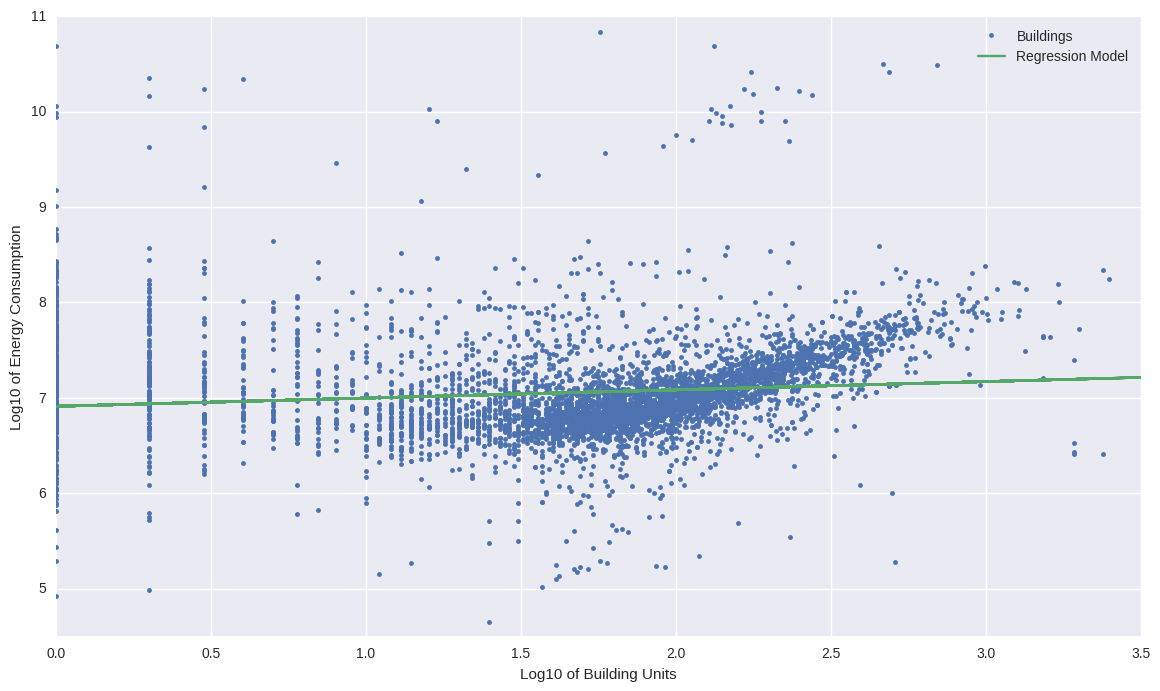

In [283]:
# using polyfit to plot points and regression line
# also trying out a function that can predict energy values based on units using the linear regression
fit = np.polyfit(df.log_units, df.log_energy, 1)
fit_fn = np.poly1d(fit)

plt.figure(figsize=(14, 8))
plt.plot(df.log_units, df.log_energy, '.', label='Buildings')
plt.plot(df.log_units, fit_fn(df.log_units), label='Regression Model')
plt.axis([0, 3.5, 4.5, 11])
plt.xlabel('Log10 of Building Units')
plt.ylabel('Log10 of Energy Consumption')
plt.legend()

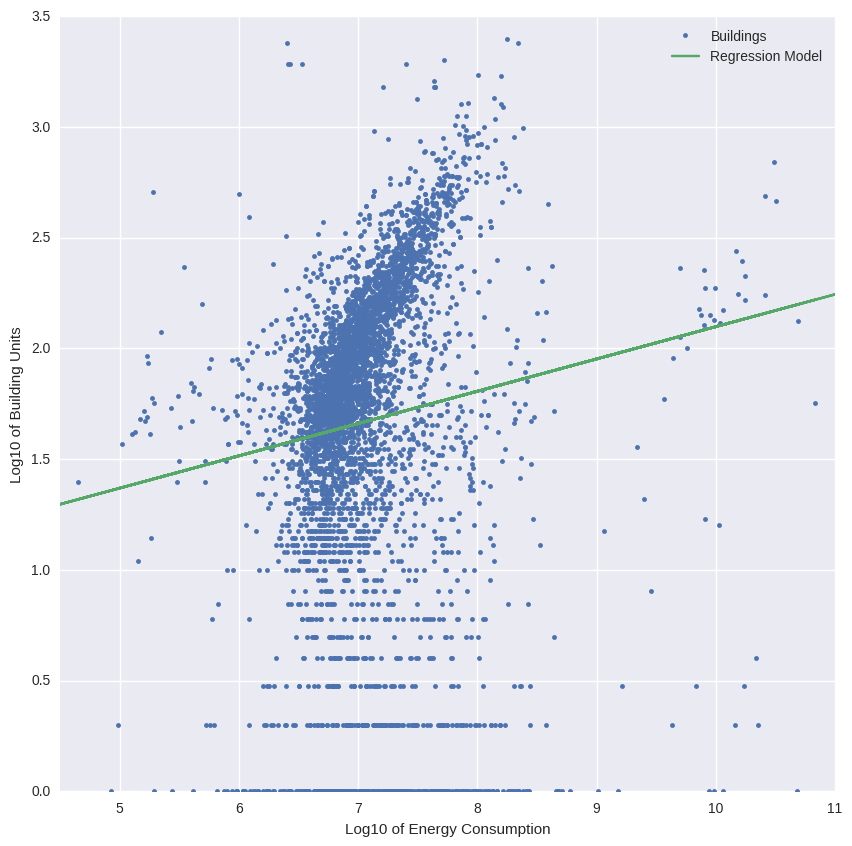

In [287]:
# above model looks better, and energy consumption as dependent variable makes more sense

fyt = np.polyfit(df.log_energy, df.log_units, 1)
fyt_fn = np.poly1d(fyt)

plt.figure(figsize=(10, 10))
plt.plot(df.log_energy, df.log_units, '.', label='Buildings')
plt.plot(df.log_energy, fyt_fn(df.log_energy), label='Regression Model')
plt.axis([ 4.5, 11, 0, 3.5])
plt.xlabel('Log10 of Energy Consumption')
plt.ylabel('Log10 of Building Units')
plt.legend()

Evaluate which is better by calculating the chi square. I provide a function for that or you can write your own. Assume poisson statistics for the errors on the independent variable. The function is
chisq = 
∑i(model(xi)−data(xi))2error2i

where the sum is over all datapoints,
for the i-th value with x value xi model is the predction of your fit for xi,
data(xi) is your observation,
and errori is data(xi)⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√ (but remember you worked in log space! What are the proper errors??)

In [294]:
# chi-squared test of first distribution
y_fit = result.predict(sm.add_constant(df.log_units))
chisq1 = np.sum(((y_fit - df.log_energy)**2)/np.sqrt(df.log_energy)**2)
chisq1

181.37768375605236

In [293]:
# chi-squared test of second distribution
y_fit2 = result.predict(sm.add_constant(df.log_energy))
chisq2 = np.sum(((y_fit2 - df.log_units)**2)/np.sqrt(df.log_units)**2)
chisq2

inf

I don't think the above attempt at a chisq test worked. Here's another try:

In [295]:
# this method provided by Ian Wright
def chisq(X, Y, model_params):
    """
    This function takes as args an observed set of x and y datapoints, 
    and the parameters to a fitted model. It returns the value of the chisquared statistic 
    that assesses the model's fit to the observed datapoints.
    """
    # compute the "model" Y-values for each value of X
    model = model_params[0] + (model_params[1] * X)
    # the numerator of the chi-squared stat is the squared residual
    num = (model - Y).map(np.square)
    # denominator is (sqrt(observed Y))^2 --> simplifies to Y
    denom = Y
    # sum across all observed datapoints
    return (num / denom).sum()

In [304]:
print ('chi-square for units = F(energy): ', chisq(X=df.log_energy, Y=df.log_units, model_params=result2.params))
print ('chi-square for energy = F(units): ', chisq(X=df.log_units, Y=df.log_energy, model_params=result.params))

chi-square for units = F(energy):  inf
chi-square for energy = F(units):  181.377683756


### This gave the same results as the test above, so I guess the chi-squared analysis is working, there just may be something wrong with my inputs. I'm not sure. Maybe we still need to divide by degrees of freedom (N-1). That doesn't explain the infinite result, though.
### Anyway, these results seem to show that it's better to plot units as the independent variable, as I suspected and the visuals of the plots above suggest.
### Now, a second degree polynomial:

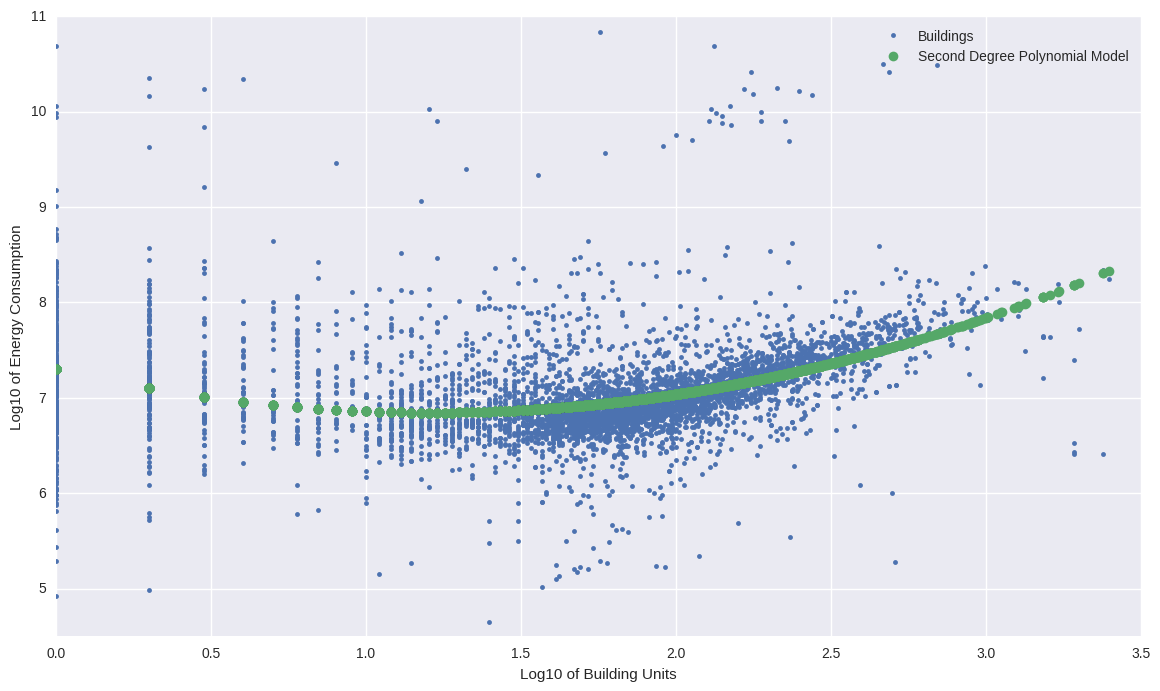

In [320]:
#the bottom edge of the green stuff looks like what we want, now trying to correct it...

fit3 = np.polyfit(df.log_units, df.log_energy, 2)
fit3_fn = np.poly1d(fit3)

plt.figure(figsize=(14, 8))
plt.plot(df.log_units, df.log_energy, '.', label='Buildings')
plt.plot(df.log_units, fit3_fn(df.log_units), 'o', linewidth=1, label='Second Degree Polynomial Model')
plt.axis([0, 3.5, 4.5, 11])
plt.xlabel('Log10 of Building Units')
plt.ylabel('Log10 of Energy Consumption')
plt.legend()

In [327]:
# LR = -2 * (logLikelihood_fit - logLikelihood_fit3)

#model3 = sm.OLS(formula = 'log_energy ~ I(log_units**2) + log_units', data = df).fit()
print ("LR : ", -2 * (model.llf - fit3.llf))

AttributeError: 'OLS' object has no attribute 'llf'